PRACTICA: Identificar los errores topologicos: GAPS

In [1]:
# Importamos las librerias
!pip install mapclassify
import pandas as pd
import geopandas as gpd
import shapely
from shapely import wkt
import matplotlib.pyplot as plt
import mapclassify
print('Librerias Importadas')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.4 MB/s eta 0:00:00
Librerias Importadas


In [2]:
# Conectamos el cuaderno actual con nuestro Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar un Shapefile
manzana = gpd.read_file('/content/drive/MyDrive/Capacitacion/Proyectos/Topologia/Gaps/Manzana.zip')

### Crear un poligono: **Bounding**

In [8]:
import geopandas as gpd
from shapely.geometry import Polygon

def crear_poligono_cubierta(gdf):
    minx, miny, maxx, maxy = gdf.total_bounds
    poligono_cubierta = Polygon([(minx, miny), (maxx, miny), (maxx, maxy), (minx, maxy)])
    bounding = gpd.GeoDataFrame(geometry=[poligono_cubierta], crs=gdf.crs)
    return bounding

In [9]:
bounding = crear_poligono_cubierta(manzana)

<Axes: >

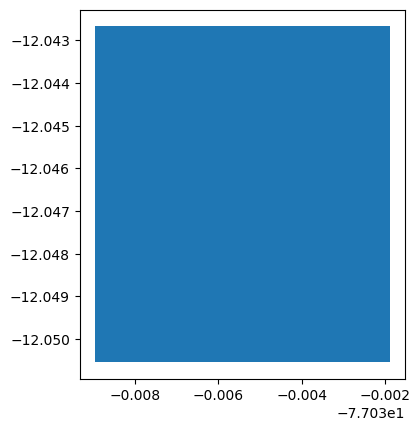

In [9]:
bounding.plot()

### Visualizacion de las dos **Geometrias**

<Axes: >

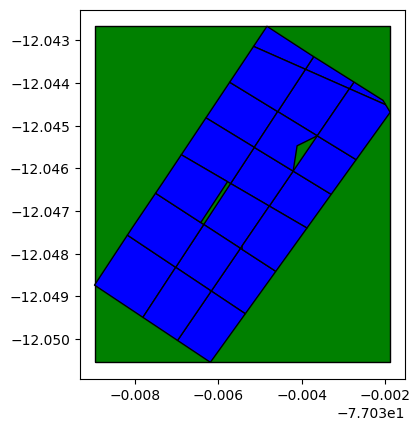

In [14]:
#Plotear las dos capas: mz y gdb_cubierta
ax = bounding.plot(color='green', edgecolor='Black')
manzana.plot(ax=ax, color='blue', edgecolor='Black')

In [10]:
m = manzana.explore(color="blue")
bounding.explore(m=m, color="green")

### Interseccion de los Poligonos: Bounding y **Manzanas**

In [11]:
def intersectar(manzana, bounding):
    gaps = gpd.overlay(bounding, manzana, how='difference')
    if gaps.empty:
        print("No se encontraron intersecciones entre Manzana y Bounding.")
        return None
    return gaps
    print("Existe intersecciones entre Manzana y Bounding.")

In [12]:
gaps = intersectar(manzana, bounding)

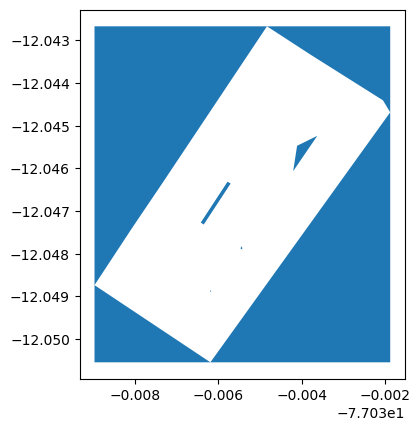

In [14]:
# Visualizar el GeoDataFrame resultante (opcional)
if gaps is not None:
    gaps.plot()

In [15]:
gaps.explore()

## Explotamos el **Gaps**

In [16]:
#Se ha creado un motipiligono
gaps_explotado = gaps.explode()

In [17]:
#Creamos un id unico
gaps_explotado['id'] = range(1, len(gaps_explotado) + 1)

In [18]:
#Calculamos el area de cada poligono
gaps_explotado['area'] = gaps_explotado.area

<ipython-input-18-db3fc10bb297>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gaps_explotado['area'] = gaps_explotado.area


In [21]:
gaps_explotado.sample(5)

,geometry,id,area,area_m
0,"POLYGON ((-77.03702 -12.04832, -77.03702 -12.0...",1,2.504277e-06,0.278253
0,"POLYGON ((-77.03617 -12.04887, -77.03618 -12.0...",2,5.694569e-10,0.000063
0,"POLYGON ((-77.03478 -12.04688, -77.03543 -12.0...",4,1.638133e-09,0.000182
0,"POLYGON ((-77.03578 -12.04631, -77.0357 -12.04...",7,9.734455e-08,0.010816
0,"POLYGON ((-77.03421 -12.04607, -77.03411 -12.0...",6,1.320922e-07,0.014677


In [22]:
#Exportar la capa gaps_explotado como un shapefile
Gaps_identificados=gaps_explotado.to_file('/content/drive/MyDrive/Capacitacion/Proyectos/Topologia/Gaps/Gaps_Identificado.shp')